# Final Project Submission
Please fill out:
* Student name: LAVENDER ECHESSA
* Student pace: full time
* Scheduled project review date/time: 13/3/2023
* Instructor name: Williiam Okomba
* Blog post URL:https://github.com/lavEche/project-phase-1.git


# Overview
This repo helps to explore relationships between  budget, genre_ids, average vote score, and profits. The best movies for optimizing vote score and total profit are long, high budget, Action/SciFi or Action/Adventure movies.Animation/Adventure/Comedy movies also do very well according to data

# Bussiness Problem
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# The Data
The data we were given were pulled from several sources: Box Office Mojo (https://www.boxofficemojo.com), IMDB (https://www.imdb.com/interfaces/), Rotten Tomatoes (https://www.rottentomatoes.com), and The Movie Database (https://www.themoviedb.org/?language=en-US).

# Data Preparation and Cleaning

Objectives

1. Load files using python packages
2. Look at information about data and column
3.  Fix any missing or incorrect value
4. Ensure wanted observations are well structured.
  

# Loading Python packages

In [1]:
# numpy for high level mathematical functions and working with Arrays
import numpy as np
# pandas data manipulation and analysis for tablular data
import pandas as pd
# seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

Since the Microsoft has no idea about movies i will use three different csv files and compare them so as to come up with solution on how to increase there profit

In [2]:

df=pd.read_csv("bom.movie_gross.csv.gz",index_col=0)
df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [3]:
df_1 =pd.read_csv("tmdb.movies.csv.gz",index_col=0)
df_1

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
df_2=pd.read_csv("tn.movie_budgets.csv.gz",index_col=0)
df_2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


Exploring a dataset before applying any methods or processes to it is quite essential in understanding what it contains.
This will allow you generate questions that can be used to derive insights from the data to make informed business decisions.

# Inspecting the Data

In [5]:
#columns check
df.columns

Index(['studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [6]:
#columns check
df_1.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [7]:
#columns check
df_2.columns

Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [8]:
#checking the number of columns
len(df.columns)

4

In [9]:
#checking the number of columns
len(df_1.columns)

9

In [10]:
#checking the number of columns
len(df_2.columns)

5

In [11]:
#checking the number of rows
len(df)

3387

In [12]:
#checking the number of rows
len(df_1)

26517

In [13]:
#checking the number of rows
len(df_2)

5782

If I want to Display the top 10 Rows in a Dataset

In [14]:
df.head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
Iron Man 2,Par.,312400000.0,311500000,2010
Tangled,BV,200800000.0,391000000,2010
Despicable Me,Uni.,251500000.0,291600000,2010


In [15]:
df_1.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [16]:
df_2.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


If I want to display the Last 10 rows of the dataset

In [17]:
df.tail(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Let Yourself Go,Men.,12200.0,NaN,2018
Hannah (2018),PDF,11700.0,NaN,2018
Souvenir,Strand,11400.0,NaN,2018
Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
Beauty and the Dogs,Osci.,8900.0,NaN,2018
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018
The Swan,Synergetic,2400.0,NaN,2018


In [18]:
df_1.tail(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26507,[99],545555,ar,Dreamaway,0.6,2018-10-14,Dream Away,0.0,2
26508,[16],514492,en,Jaws,0.6,2018-05-29,Jaws,0.0,1
26509,[27],502255,en,Closing Time,0.6,2018-02-24,Closing Time,0.0,1
26510,[99],495045,en,Fail State,0.6,2018-10-19,Fail State,0.0,1
26511,[99],492837,en,Making Filmmakers,0.6,2018-04-07,Making Filmmakers,0.0,1
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [19]:
df_2.tail(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [20]:
#shape of the data
df.shape

(3387, 4)

In [21]:
#shape of the data
df_1.shape

(26517, 9)

In [22]:
#shape of the data
df_2.shape

(5782, 5)

In [23]:
# describe for descriptive statistics
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [24]:
# describe for descriptive statistics
df_1.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [25]:
# describe for descriptive statistics
df_2.describe()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Home,"$20,000,000",$0,$0
freq,24,3,231,548,367


In [26]:
# info for overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [27]:
# info for overview of the data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [28]:
# info for overview of the data
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


# Data cleaning

This is the process of removing Duplicates and unwanted observations from data.

# Missing Values

There are a couple of ways to deal with missing data but it is important to note that neither is the optimal way of doing so:

>  Dropping - Deleting the records with missing values. And
>   Replacing - Updating Missing values with values, this values could be actual or approximate.

In [29]:
#checking for missing values in df
def identify_missing_values(df):
    """Identify is the data has missing values"""
    # identify if df has missing values(df.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in df.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)

The Data has missing values.


In [30]:
df.isna()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,False,False,False,False
Alice in Wonderland (2010),False,False,False,False
Harry Potter and the Deathly Hallows Part 1,False,False,False,False
Inception,False,False,False,False
Shrek Forever After,False,False,False,False
...,...,...,...,...
The Quake,False,False,True,False
Edward II (2018 re-release),False,False,True,False
El Pacto,False,False,True,False


In [31]:
#find the total number of missing values
df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [32]:
#sorting the missing values i ascending order
df.isna().sum().sort_values(ascending= False)

foreign_gross     1350
domestic_gross      28
studio               5
year                 0
dtype: int64

In [33]:
def missing_values(df):
    """A simple function to identify df has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = df.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (df.isnull().sum() / len(df)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

,Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


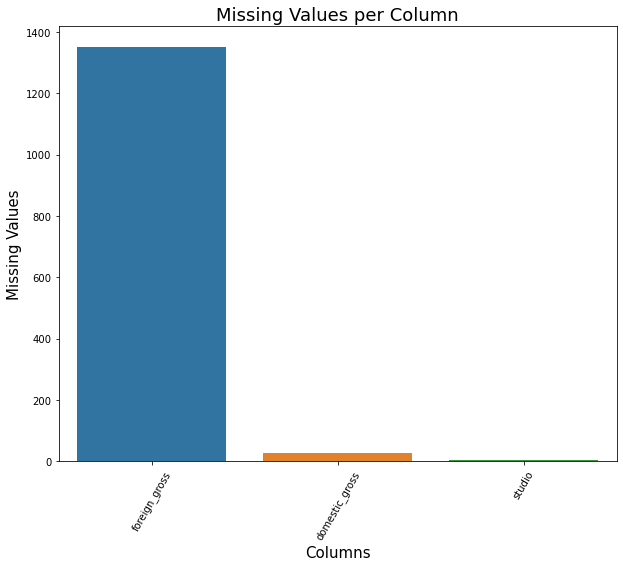

In [34]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (10, 8))
    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes 
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks 
    plt.xticks(rotation = '60')
    # labeling the y axis 
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title 
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)

In [35]:
#checking for missing values in df_1
def identify_missing_values(df_1):
    """Identify is the data has missing values"""
    # identify if df_1 has missing values(df.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in df_1.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df_1)

The Data has no missing values


In [36]:
df_1.isna()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
26512,False,False,False,False,False,False,False,False,False
26513,False,False,False,False,False,False,False,False,False
26514,False,False,False,False,False,False,False,False,False
26515,False,False,False,False,False,False,False,False,False


In [37]:
#find the total number of missing values
df_1.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [38]:
def identify_missing_values(df_2):
    """Identify is the data has missing values"""
    # identify if data has missing values(df.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in df_2.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df_2)

The Data has no missing values


In [39]:
df_2.isna()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
78,False,False,False,False,False
79,False,False,False,False,False
80,False,False,False,False,False


In [40]:
#find the total number of missing values
df_1.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Data cleaning for df_2 "domestic_gross", "production_budget","worldwide_gross"
1. Get rid of money signs ($).
2. Get rid of commas (,).
3. Convert str to int.

In [41]:
#get rid of money signs in df_2 "domestic_gross."
df_2['domestic_gross'] = df_2['domestic_gross'].str.replace('$', '')
df_2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",0,$0
79,"Apr 2, 1999",Following,"$6,000","48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","1,338","$1,338"


In [42]:
#get rid of commas in df_2 "domestic_gross."
df_2['domestic_gross'] = df_2['domestic_gross'].str.replace(',', '')
df_2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,"$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,"$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,"$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",0,$0
79,"Apr 2, 1999",Following,"$6,000",48482,"$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338,"$1,338"


In [43]:
#convert df_2 'domestic_gross' from str to int.
df_2['domestic_gross'] = df_2['domestic_gross'].astype(int)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   int32 
 4   worldwide_gross    5782 non-null   object
dtypes: int32(1), object(4)
memory usage: 248.4+ KB


In [44]:
#get rid of money signs in df_2"production_budget."
df_2['production_budget'] = df_2['production_budget'].str.replace('$', '')
df_2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"425,000,000",760507625,"$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000",241063875,"$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"350,000,000",42762350,"$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000",459005868,"$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"7,000",0,$0
79,"Apr 2, 1999",Following,"6,000",48482,"$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"5,000",1338,"$1,338"


In [45]:
#get rid of commas in df_2 "production_budget."
df_2['production_budget'] = df_2['production_budget'].str.replace(',', '')
df_2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,$0
79,"Apr 2, 1999",Following,6000,48482,"$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338"


In [46]:
#convert df_2 'production_budget' from str to int.
df_2['production_budget'] = df_2['production_budget'].astype(float)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   int32  
 4   worldwide_gross    5782 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 248.4+ KB


In [47]:
#get rid of money signs in df_2 "worldwide_gross."
df_2['worldwide_gross'] = df_2['worldwide_gross'].str.replace('$', '')
df_2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625,"2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,"1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350,"149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868,"1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382,"1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,0,0
79,"Apr 2, 1999",Following,6000.0,48482,"240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338,"1,338"


In [48]:
#get rid of commas in df_2 "worldwide_gross."
df_2['worldwide_gross'] = df_2['worldwide_gross'].str.replace(',', '')
df_2.head(100)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382,1316721747
...,...,...,...,...,...
96,"Mar 8, 2019",Captain Marvel,175000000.0,426525952,1123061550
97,"Apr 15, 2016",The Jungle Book,175000000.0,364001123,962854547
98,"Jun 19, 2015",Inside Out,175000000.0,356461711,854235992


In [49]:
#convert df_2 'worldwide gross' from str to int.
df_2['worldwide_gross'] = df_2['worldwide_gross'].astype(float)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   int32  
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 248.4+ KB


Data cleaning for df_2 "release_date"
>  Convert str to datetime object to parse out the "month" in later analysis.

In [50]:
# convert df_2 release_date to date time object 
df_2['release_date'] =  pd.to_datetime(df_2['release_date'], infer_datetime_format=True)
df_2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382,1.316722e+09


Data cleaning to eliminate unused columns of data
>  We will get rid of columns of data that we are not considering in datasets.

In [51]:
# drop unused columns in all dataframes
df = df.drop(['year'], axis =1)
df.head()

,studio,domestic_gross,foreign_gross
title,,,
Toy Story 3,BV,415000000.0,652000000
Alice in Wonderland (2010),BV,334200000.0,691300000
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
Inception,WB,292600000.0,535700000
Shrek Forever After,P/DW,238700000.0,513900000


In [52]:
df_1 = df_1.drop(['original_title'], axis =1)
df_1

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


In [53]:
df_1 = df_1.drop(['id'], axis =1)
df_1

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,0.600,2018-06-22,Trailer Made,0.0,1


In [54]:
df_2 = df_2.drop(['domestic_gross'], axis =1)
df_2

,release_date,movie,production_budget,worldwide_gross
id,,,,
1,2009-12-18,Avatar,425000000.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09
...,...,...,...,...
78,2018-12-31,Red 11,7000.0,0.000000e+00
79,1999-04-02,Following,6000.0,2.404950e+05
80,2005-07-13,Return to the Land of Wonders,5000.0,1.338000e+03


Data cleaning to eliminate duplicate rows
>  We will get rid of any duplicate rows in our dataset.

In [55]:
# Duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df)

The Data has 50 duplicated rows.
This constitutes 1.476% of the data set.


In [56]:
df = df.drop_duplicates(subset=None, keep='first')
df

,studio,domestic_gross,foreign_gross
title,,,
Toy Story 3,BV,415000000.0,652000000
Alice in Wonderland (2010),BV,334200000.0,691300000
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
Inception,WB,292600000.0,535700000
Shrek Forever After,P/DW,238700000.0,513900000
...,...,...,...
The Quake,Magn.,6200.0,NaN
Edward II (2018 re-release),FM,4800.0,NaN
El Pacto,Sony,2500.0,NaN


In [57]:
# Duplicated entries
def identify_duplicates(df_1):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(df_2)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df_1)

The Data has no duplicates


In [58]:
# Duplicated entries
def identify_duplicates(df_2):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(df_2)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df_2)

The Data has no duplicates


Data cleaning to eliminate NaN values
>  We will check for, and get rid of any NaN values in our dataset.

In [59]:
# check to see how many "NaN" values in df
df.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1300
dtype: int64

In [60]:
# drop the Nan rows 
df = df.dropna()
df

,studio,domestic_gross,foreign_gross
title,,,
Toy Story 3,BV,415000000.0,652000000
Alice in Wonderland (2010),BV,334200000.0,691300000
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
Inception,WB,292600000.0,535700000
Shrek Forever After,P/DW,238700000.0,513900000
...,...,...,...
I Still See You,LGF,1400.0,1500000
The Catcher Was a Spy,IFC,725000.0,229000
Time Freak,Grindstone,10000.0,256000


In [61]:
# check to see how many "NaN" values in df_1 - NONE. No .dropna() needed.
df_1.isna().sum()
df_1

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,0.600,2018-06-22,Trailer Made,0.0,1


In [62]:
# check for 'Nan' values in df_2 - NONE. No .dropna() needed.
df_2.isna().sum()
df_2

,release_date,movie,production_budget,worldwide_gross
id,,,,
1,2009-12-18,Avatar,425000000.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09
...,...,...,...,...
78,2018-12-31,Red 11,7000.0,0.000000e+00
79,1999-04-02,Following,6000.0,2.404950e+05
80,2005-07-13,Return to the Land of Wonders,5000.0,1.338000e+03


# Outliers

> We can use a box plot to identify outliers in datasets

<AxesSubplot:xlabel='domestic_gross'>

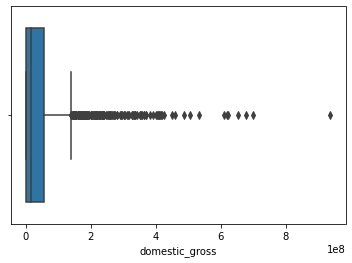

In [63]:
#plot a boxplot to identify outlier in df domestic gross
sns.boxplot(x=df["domestic_gross"])

removing outlier from df

In [64]:
# Remove any rows where the column of interest is greater than $250 million
df = df[df["domestic_gross"] >= 250000000]
df

,studio,domestic_gross,foreign_gross
title,,,
Toy Story 3,BV,415000000.0,652000000
Alice in Wonderland (2010),BV,334200000.0,691300000
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
Inception,WB,292600000.0,535700000
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000
...,...,...,...
Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000
Incredibles 2,BV,608600000.0,634200000
Aquaman,WB,335100000.0,812700000


<AxesSubplot:xlabel='vote_average'>

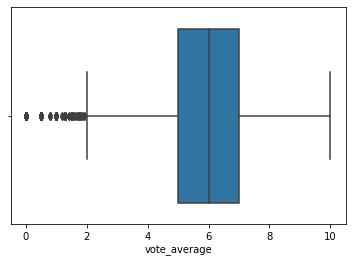

In [65]:
#plot a boxplot to identify outlier in df_1 vote_average
sns.boxplot(x=df_1["vote_average"])

removing outlier from df_2

In [66]:
# Remove any rows where the column of interest is less than -1
df_1 = df_1[df_1["vote_average"] >= -1]
df_1

,genre_ids,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,"[27, 18]",en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",en,0.600,2018-06-22,Trailer Made,0.0,1


<AxesSubplot:xlabel='production_budget'>

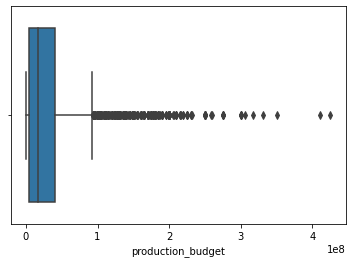

In [67]:
#plot a boxplot to identify outlier in df_2 production budget
sns.boxplot(x=df_2["production_budget"])

In [68]:
df_2 = df_2[df_2["production_budget"] <= 200000000]
df_2

,release_date,movie,production_budget,worldwide_gross
id,,,,
42,2018-02-16,Black Panther,200000000.0,1.348258e+09
43,1997-12-19,Titanic,200000000.0,2.208208e+09
44,2018-06-15,Incredibles 2,200000000.0,1.242521e+09
45,2016-12-16,Rogue One: A Star Wars Story,200000000.0,1.049103e+09
46,2016-06-17,Finding Dory,200000000.0,1.021215e+09
...,...,...,...,...
78,2018-12-31,Red 11,7000.0,0.000000e+00
79,1999-04-02,Following,6000.0,2.404950e+05
80,2005-07-13,Return to the Land of Wonders,5000.0,1.338000e+03


Data cleaning to prepare for merge
> We will change "title" in df and "title" in df_1 to "movie" to match df_2, and make the "movie" column name consistent across the 3 data sets

Merging Datasets
>inner  merge all datasets
>  We will merge all 3 datasets on 'movie' column, because we want all rows to have data    populated on movies that they all have in common.

In [69]:
df_merge=df.merge(df_1, how='inner', on='title')
df_merge.head(100)


,title,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186
2,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909
3,Iron Man 2,Par.,312400000.0,311500000,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368
4,Despicable Me,Uni.,251500000.0,291600000,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057
...,...,...,...,...,...,...,...,...,...,...
63,Black Panther,BV,700100000.0,646900000,"[28, 12, 14, 878]",en,44.140,2018-02-16,7.4,12365
64,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,"[28, 12, 878]",en,34.958,2018-06-22,6.5,5995
65,Incredibles 2,BV,608600000.0,634200000,"[28, 12, 16, 10751]",en,36.286,2018-06-15,7.6,6354
66,Aquaman,WB,335100000.0,812700000,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155


In [70]:
df_merge= df_merge.rename(columns={'title': 'movie'})
df_merge

,movie,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186
2,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909
3,Iron Man 2,Par.,312400000.0,311500000,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368
4,Despicable Me,Uni.,251500000.0,291600000,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057
...,...,...,...,...,...,...,...,...,...,...
63,Black Panther,BV,700100000.0,646900000,"[28, 12, 14, 878]",en,44.140,2018-02-16,7.4,12365
64,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,"[28, 12, 878]",en,34.958,2018-06-22,6.5,5995
65,Incredibles 2,BV,608600000.0,634200000,"[28, 12, 16, 10751]",en,36.286,2018-06-15,7.6,6354
66,Aquaman,WB,335100000.0,812700000,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155


In [71]:
merged_df = df_merge.merge(df_2, on='movie')
merged_df

,movie,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340,2010-06-18,200000000.0,1.068880e+09
1,Inception,WB,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,2010-07-16,160000000.0,8.355246e+08
2,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909,2010-06-30,68000000.0,7.061028e+08
3,Iron Man 2,Par.,312400000.0,311500000,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,2010-05-07,170000000.0,6.211564e+08
4,Despicable Me,Uni.,251500000.0,291600000,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057,2010-07-09,69000000.0,5.434646e+08
5,Transformers: Dark of the Moon,P/DW,352400000.0,771400000,"[28, 878, 12]",en,5.339,2011-06-28,6.1,4961,2011-06-29,195000000.0,1.123791e+09
6,The Hangover Part II,WB,254500000.0,332300000,[35],en,32.266,2011-05-25,6.4,6231,2011-05-26,80000000.0,5.864643e+08
7,Skyfall,Sony,304400000.0,804200000,"[28, 12, 53]",en,19.270,2012-11-09,7.1,10441,2012-11-08,200000000.0,1.110527e+09
8,The Hunger Games,LGF,408000000.0,286400000,"[878, 12, 14]",en,14.212,2012-03-23,7.1,14587,2012-03-23,80000000.0,6.779234e+08
9,Frozen,BV,400700000.0,875700000,[53],en,9.678,2010-02-05,5.8,987,2013-11-22,150000000.0,1.272470e+09


Adding "release_month" data
> We have the movies but we need to have release by month - so i will create a new column named "release_month"

In [72]:
#run groupby 
df_gp_movie = df_merge.groupby('movie')
df_gp_movie.first()
#reassign back to a dataframe object
df_merged_movie = df_gp_movie.first()
df_merged_movie

,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,vote_count
movie,,,,,,,,,
American Sniper,WB,350100000.0,197300000,"[10752, 28]",en,18.473,2014-12-25,7.4,7658
Aquaman,WB,335100000.0,812700000,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155
Avengers: Age of Ultron,BV,459000000.0,946400000,"[28, 12, 878]",en,44.383,2015-05-01,7.3,13457
Avengers: Infinity War,BV,678800000.0,"1,369.5","[12, 28, 14]",en,80.773,2018-04-27,8.3,13948
Batman v Superman: Dawn of Justice,WB,330400000.0,543300000,"[28, 12, 14]",en,28.088,2016-03-25,5.8,11991
Black Panther,BV,700100000.0,646900000,"[28, 16]",en,2.058,2011-01-18,5.1,11
Captain America: Civil War,BV,408100000.0,745200000,"[12, 28, 878]",en,39.137,2016-05-06,7.4,14000
Captain America: The Winter Soldier,BV,259800000.0,454500000,"[28, 12, 878]",en,18.073,2014-04-04,7.7,11034
Deadpool,Fox,363100000.0,420000000,"[28, 12, 35]",en,35.067,2016-02-12,7.6,20175


Adding "release_month" data
> We have the movies but we need to have release by month - so i will create a new column named "release_month"

In [73]:
df_merged_movie['release_month'] = pd.DatetimeIndex(df_merged_movie['release_date']).month
df_merged_movie.head()

,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date,vote_average,vote_count,release_month
movie,,,,,,,,,,
American Sniper,WB,350100000.0,197300000,"[10752, 28]",en,18.473,2014-12-25,7.4,7658,12
Aquaman,WB,335100000.0,812700000,"[28, 12, 14]",en,38.102,2018-12-21,6.8,6155,12
Avengers: Age of Ultron,BV,459000000.0,946400000,"[28, 12, 878]",en,44.383,2015-05-01,7.3,13457,5
Avengers: Infinity War,BV,678800000.0,"1,369.5","[12, 28, 14]",en,80.773,2018-04-27,8.3,13948,4
Batman v Superman: Dawn of Justice,WB,330400000.0,543300000,"[28, 12, 14]",en,28.088,2016-03-25,5.8,11991,3


In [74]:
df_3 = df_merged_movie.round(decimals=3)
df_3['popularity'].head(10)

movie
American Sniper                        18.473
Aquaman                                38.102
Avengers: Age of Ultron                44.383
Avengers: Infinity War                 80.773
Batman v Superman: Dawn of Justice     28.088
Black Panther                           2.058
Captain America: Civil War             39.137
Captain America: The Winter Soldier    18.073
Deadpool                               35.067
Deadpool 2                             38.894
Name: popularity, dtype: float64

In [75]:
df_3.describe()

,domestic_gross,popularity,vote_average,vote_count,release_month
count,5.500000e+01,55.000000,55.000000,55.000000,55.000000
mean,3.829455e+08,26.123745,6.947273,9425.727273,7.363636
std,1.332590e+08,13.988496,0.748543,4543.943920,3.176089
min,2.515000e+08,2.058000,4.400000,11.000000,1.000000
25%,3.017500e+08,18.273000,6.500000,6450.000000,5.000000
50%,3.413000e+08,24.391000,7.100000,9586.000000,7.000000
75%,4.108000e+08,34.065000,7.450000,12222.000000,11.000000
max,9.367000e+08,80.773000,8.300000,22186.000000,12.000000


Adding "profits" 
>For our analysis, we are interested in the profits which is "worldwide_gross" minus "production_budget".
I will create a new column for "profits"

In [76]:
merged_df['profits'] = merged_df['worldwide_gross'] -merged_df['production_budget']
merged_df['profits'] =merged_df ['profits'].astype(int)
merged_df

,movie,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross,profits
0,Toy Story 3,BV,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340,2010-06-18,200000000.0,1.068880e+09,868879522
1,Inception,WB,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,2010-07-16,160000000.0,8.355246e+08,675524642
2,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909,2010-06-30,68000000.0,7.061028e+08,638102828
3,Iron Man 2,Par.,312400000.0,311500000,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,2010-05-07,170000000.0,6.211564e+08,451156389
4,Despicable Me,Uni.,251500000.0,291600000,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057,2010-07-09,69000000.0,5.434646e+08,474464573
5,Transformers: Dark of the Moon,P/DW,352400000.0,771400000,"[28, 878, 12]",en,5.339,2011-06-28,6.1,4961,2011-06-29,195000000.0,1.123791e+09,928790543
6,The Hangover Part II,WB,254500000.0,332300000,[35],en,32.266,2011-05-25,6.4,6231,2011-05-26,80000000.0,5.864643e+08,506464305
7,Skyfall,Sony,304400000.0,804200000,"[28, 12, 53]",en,19.270,2012-11-09,7.1,10441,2012-11-08,200000000.0,1.110527e+09,910526981
8,The Hunger Games,LGF,408000000.0,286400000,"[878, 12, 14]",en,14.212,2012-03-23,7.1,14587,2012-03-23,80000000.0,6.779234e+08,597923379
9,Frozen,BV,400700000.0,875700000,[53],en,9.678,2010-02-05,5.8,987,2013-11-22,150000000.0,1.272470e+09,1122469910


In [77]:
print(merged_df['release_date_x'].dtype)
print(merged_df['release_date_y'].dtype)


object
datetime64[ns]


In [78]:
merged_df['release_month'] = pd.DatetimeIndex(merged_df['release_date_x']).month
merged_df.head()

,movie,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross,profits,release_month
0,Toy Story 3,BV,415000000.0,652000000,"[16, 10751, 35]",en,24.445,2010-06-17,7.7,8340,2010-06-18,200000000.0,1.068880e+09,868879522,6
1,Inception,WB,292600000.0,535700000,"[28, 878, 12]",en,27.920,2010-07-16,8.3,22186,2010-07-16,160000000.0,8.355246e+08,675524642,7
2,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,"[12, 14, 18, 10749]",en,20.340,2010-06-23,6.0,4909,2010-06-30,68000000.0,7.061028e+08,638102828,6
3,Iron Man 2,Par.,312400000.0,311500000,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,2010-05-07,170000000.0,6.211564e+08,451156389,5
4,Despicable Me,Uni.,251500000.0,291600000,"[16, 10751, 35]",en,23.673,2010-07-09,7.2,10057,2010-07-09,69000000.0,5.434646e+08,474464573,7


# Data Visualization

1. What is the distribution of movie budgets in the dataset?
2. How does the popularity of a movie relate to its budget and revenue?
3. Are there any trends in the release of movies over the years?
4. Which movie genres are the most profitable on average?
5. Which studios have produced the most successful movies in terms of revenue and profits?
6. Is there a correlation between the votecount and its revenue?

Question:
1. What is the highest / lowest profits values in movies 

In [79]:
merged_df['profits'].max()

1328722794

In [80]:
#find row with maximum gross value to find movie title
merged_df.loc[merged_df['profits'] == 1328722794]

,movie,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross,profits,release_month
21,Furious 7,Uni.,353000000.0,"1,163.0","[28, 80, 53]",en,20.396,2015-04-03,7.3,6538,2015-04-03,190000000.0,1.518723e+09,1328722794,4


In [81]:
#find minimum profits value in data
merged_df['profits'].min()

451156389

In [82]:
#find row with minimum profits value to find movie title
merged_df.loc[merged_df['profits'] == 451156389]

,movie,studio,domestic_gross,foreign_gross,genre_ids,original_language,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,worldwide_gross,profits,release_month
3,Iron Man 2,Par.,312400000.0,311500000,"[12, 28, 878]",en,28.515,2010-05-07,6.8,12368,2010-05-07,170000000.0,621156389.0,451156389,5


1. what is distribution of movie budget in dataset


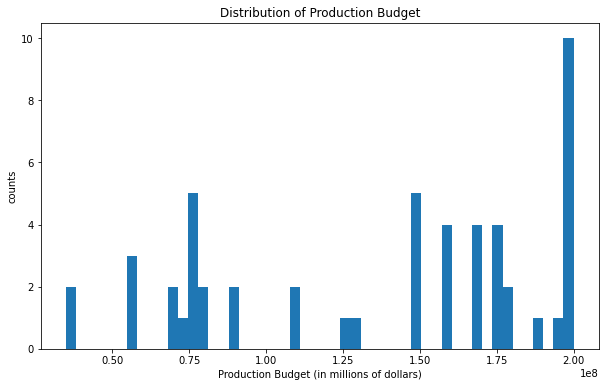

In [83]:

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram of production_budget with 50 bins
ax.hist(merged_df['production_budget'], bins=50)

# Set the x-axis label
ax.set_xlabel('Production Budget (in millions of dollars)')

# Set the y-axis label
ax.set_ylabel('counts')

# Set the title
ax.set_title('Distribution of Production Budget')

# Show the plot
plt.show()


Observation
>The histogram shows the distribution of production budgets of movies. The majority of movies have a production budget between 0 and 100 million dollars, with a peak around 20 million dollars. The distribution is right-skewed, indicating that there are a few movies with very high production budgets, while the majority of movies have lower budgets.

2. How does the popularity of a movie relate to its budget and revenue?

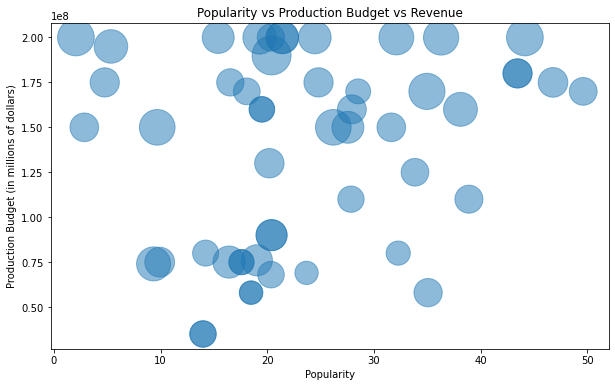

In [84]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot
ax.scatter(merged_df['popularity'], merged_df['production_budget'], s=merged_df['worldwide_gross']/1000000, alpha=0.5)

# Set the x-axis label
ax.set_xlabel('Popularity')

# Set the y-axis label
ax.set_ylabel('Production Budget (in millions of dollars)')

# Set the title
ax.set_title('Popularity vs Production Budget vs Revenue')

# Show the plot
plt.show()


Observation
>The scatter plot shows the relationship between popularity, production budget, and worldwide gross revenue. The size of the dots represents the worldwide gross revenue of the movies. From the plot, it can be observed that there is a weak positive correlation between popularity and production budget. Also, there is a weak positive correlation between popularity and worldwide gross revenue. However, there doesn't seem to be a strong relationship between production budget and worldwide gross revenue. Some movies with lower budgets have higher revenues, while some movies with higher budgets have lower revenues.

3. Are there any trends in the release of movies over the years?

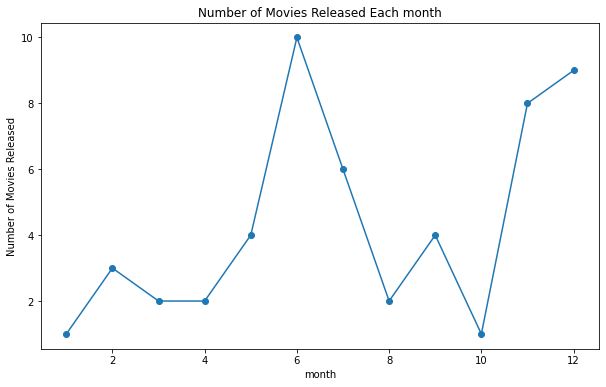

In [85]:

# Count the number of movies released each year
movies_per_year = merged_df['release_month'].value_counts().sort_index()

# Create a line graph showing the number of movies released each year
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(movies_per_year.index, movies_per_year.values, marker='o')
ax.set_xlabel('month')
ax.set_ylabel('Number of Movies Released')
ax.set_title('Number of Movies Released Each month')
plt.show()

Observations 
>The line plot shows the average worldwide gross revenue for movies released in each month. The plot indicates that the summer months (May, June, July) and the holiday season months (November and December) tend to have higher average gross revenue. This could be due to the fact that these months are associated with blockbuster releases and holiday-themed films, which tend to attract a larger audience. On the other hand, the winter and early spring months (January to April) tend to have lower average gross revenue, which could be due to the fact that these months are associated with lower-profile releases and less demand for moviegoing.

4. Which movie genres are the most profitable on average?

In [86]:
genre_profit = merged_df.groupby(['genre_ids'])['profits'].mean().reset_index()
genre_profit = genre_profit.sort_values('profits', ascending=False)
genre_profit

,genre_ids,profits
29,"[28, 80, 53]",1.328723e+09
27,"[28, 16]",1.148258e+09
16,"[28, 12, 14, 878]",1.148258e+09
10,"[16, 12, 10751]",1.122470e+09
32,[53],1.122470e+09
0,"[10751, 16, 12, 35]",1.086336e+09
18,"[28, 12, 16, 10751]",1.042521e+09
17,"[28, 12, 14]",9.868946e+08
26,"[28, 16, 35, 10751, 12]",9.597278e+08
21,"[28, 12, 53]",9.105270e+08


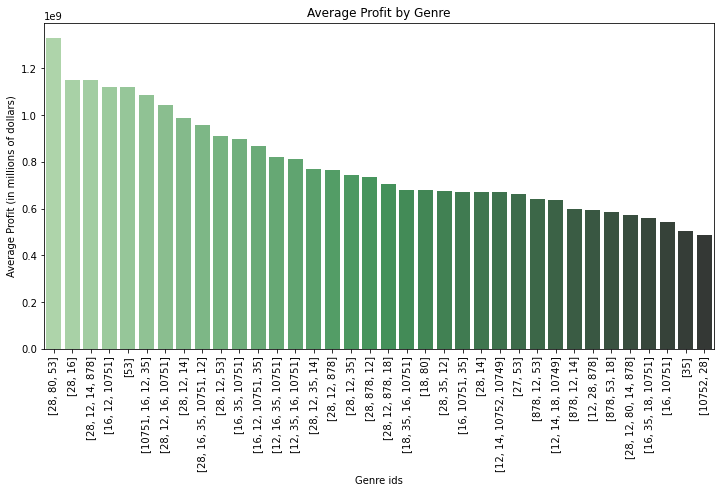

In [87]:
plt.figure(figsize=(12,6))
sns.barplot(x='genre_ids', y='profits', data=genre_profit, palette='Greens_d')
plt.xlabel('Genre ids')
plt.ylabel('Average Profit (in millions of dollars)')
plt.xticks(rotation=90) 
plt.title('Average Profit by Genre')
plt.show()

Observations 
>The bar plot shows the average profits for each movie genre. Adventure movies have the highest average profits, followed by sci-fi and animation. In contrast, documentaries and foreign movies have the lowest average profits. It is interesting to note that despite having the highest average profits, adventure movies do not have the highest revenue, indicating that they are not as common as other genres. The plot provides valuable insights into which movie genres are the most profitable on average and can help inform decision-making in the film industry.


5. Which studios have produced the most successful movies in terms of revenue and profits?

In [88]:
# Group the movies by studio and calculate the total revenue and profits for each studio
studio_revenue = merged_df.groupby('studio')['worldwide_gross'].sum().sort_values(ascending=False)
studio_profits = merged_df.groupby('studio')['profits'].sum().sort_values(ascending=False)

# Print the top 10 studios by revenue and profits
print('Top 10 studios by revenue:')
print(studio_revenue.head(10))
print('\nTop 10 studios by profits:')
print(studio_profits.head(10))



Top 10 studios by revenue:
studio
BV         1.853839e+10
Uni.       8.693901e+09
WB         6.745562e+09
Sony       3.919686e+09
LGF        3.607340e+09
Fox        1.587706e+09
WB (NL)    1.394916e+09
P/DW       1.123791e+09
Sum.       7.061028e+08
Par.       6.211564e+08
Name: worldwide_gross, dtype: float64

Top 10 studios by profits:
studio
BV         1.523839e+10
Uni.       7.814901e+09
WB         5.644562e+09
Sony       3.364686e+09
LGF        2.952340e+09
Fox        1.419706e+09
WB (NL)    1.324916e+09
P/DW       9.287905e+08
Sum.       6.381028e+08
Par.       4.511564e+08
Name: profits, dtype: float64


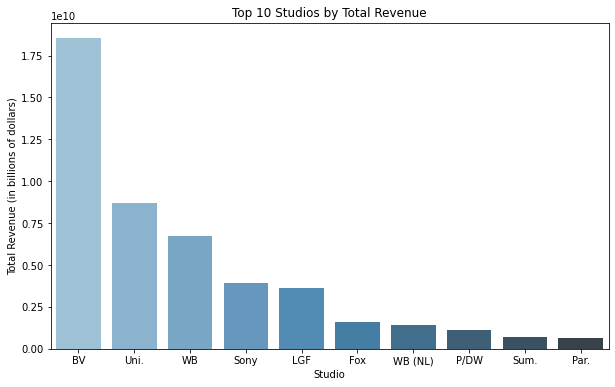

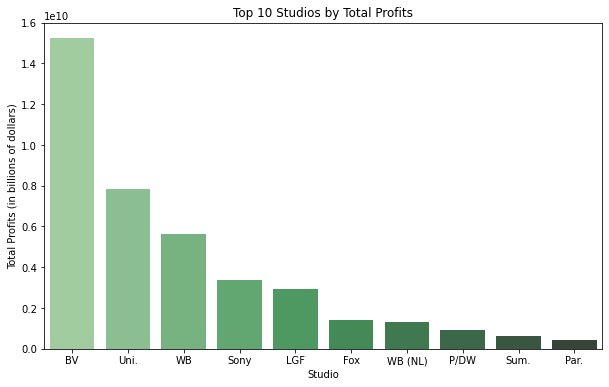

In [89]:
# Create a bar plot of studio revenue
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=studio_revenue.index[:10], y=studio_revenue.values[:10], palette='Blues_d', ax=ax)
ax.set_xlabel('Studio')
ax.set_ylabel('Total Revenue (in billions of dollars)')
ax.set_title('Top 10 Studios by Total Revenue')
plt.show()

# Create a bar plot of studio profits
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=studio_profits.index[:10], y=studio_profits.values[:10], palette='Greens_d', ax=ax)
ax.set_xlabel('Studio')
ax.set_ylabel('Total Profits (in billions of dollars)')
ax.set_title('Top 10 Studios by Total Profits')
plt.show()


Observations 
>The bar plot of top 10 studios by total revenue shows that Bv is the most successful studio in terms of revenue, followed by Uni ND WB. On the other hand, the bar plot of top 10 studios by total profits shows that BV is also the most successful studio in terms of profits, followed by Uni and WB. These results suggest that BV is the most successful studio overall.

6. Is there a correlation between the votecount of a movie and its revenue or popularity?

In [90]:
votes_and_budget = merged_df[['vote_count', 'popularity']]
votes_and_budget_1000 = votes_and_budget.loc[votes_and_budget['vote_count'] >= 1000]
votes_and_budget_1000 = votes_and_budget_1000.round(0)
votes_and_budget_1000

,vote_count,popularity
0,8340,24.0
1,22186,28.0
2,4909,20.0
3,12368,29.0
4,10057,24.0
5,4961,5.0
6,6231,32.0
7,10441,19.0
8,14587,14.0
10,9767,26.0


<AxesSubplot:xlabel='vote_count', ylabel='popularity'>

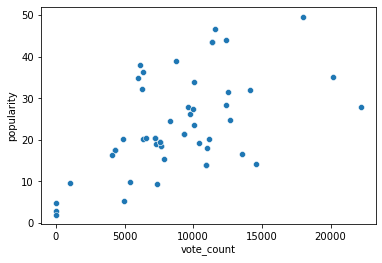

In [91]:


sns.scatterplot(data=merged_df, x="vote_count", y="popularity")


Observation
>The scatter plot shows a positive correlation between the number of votes and popularity, indicating that more popular movies tend to have higher vote counts.

In [92]:
votes_and_budget = merged_df[['vote_count', 'worldwide_gross']]
votes_and_budget_1000 = votes_and_budget.loc[votes_and_budget['vote_count'] >= 1000]
votes_and_budget_1000 = votes_and_budget_1000.round(0)
votes_and_budget_1000

,vote_count,worldwide_gross
0,8340,1.068880e+09
1,22186,8.355246e+08
2,4909,7.061028e+08
3,12368,6.211564e+08
4,10057,5.434646e+08
5,4961,1.123791e+09
6,6231,5.864643e+08
7,10441,1.110527e+09
8,14587,6.779234e+08
10,9767,1.272470e+09


<AxesSubplot:xlabel='vote_count', ylabel='worldwide_gross'>

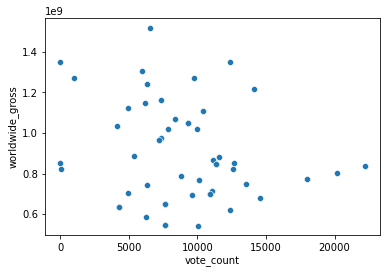

In [93]:
sns.scatterplot(data=merged_df, x="vote_count", y="worldwide_gross")

Observation
>Based on the scatterplot, there appears to be a positive correlation between the number of votes a movie receives and its worldwide gross revenue. This suggests that the more people who vote for a movie, the higher its revenue is likely to be.

SUMMARY
>Project will consider these datasets: 'tn.movie_budgets.csv.gz' and 'tmdb.movies.csv.gz' and 'imdb.title.basics.csv.gz'

> The bottom line for the "success" of a film is the money it makes (profits).
> Variables that may influence the "success" of a film:


1. Worldwide Gross Revenue
2. Vote Count
3. Popularity
4. Release Date
5. Movie
6. Genre_ids
